# Plot History - Initial Conditions Optimization

In [185]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
import matplotlib.style as style
style.use('fivethirtyeight')
import ray
import io
import os
from IPython.display import display, HTML, Markdown

In [186]:
import matplotlib.font_manager as fm
# Font Imports
heading_font = fm.FontProperties(fname='/home/ats4i/playfair-display/PlayfairDisplay-Regular.ttf', size=24)
subtitle_font = fm.FontProperties(fname='/home/ats4i/Roboto/Roboto-Regular.ttf', size=16)

Main code

In [187]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines){
    return false;}

<IPython.core.display.Javascript object>

In [188]:
dfparam = pd.read_csv("data/param.csv")
display(dfparam)


,state,start-date,prediction-range,s0,e0,a0,i0,r0,d0,START,RATIO,WCASES,WREC
0,SP,2020-03-15,200,8000000.0,0,0,800,300,250,100,0.15,0.55,0.01
1,ES,2020-04-01,200,475000.0,0,0,50,250,50,100,0.15,0.65,0.01
2,MG,2020-04-01,200,1100000.0,0,0,200,250,40,100,0.15,0.55,0.01
3,RJ,2020-03-20,200,700000.0,0,0,800,250,50,100,0.15,0.50,0.01
4,CE,2020-03-20,200,800000.0,0,0,800,250,50,100,0.15,0.50,0.01
5,PE,2020-03-20,200,700000.0,0,0,800,250,100,100,0.15,0.50,0.01
6,AM,2020-03-20,200,700000.0,0,0,800,250,100,100,0.15,0.50,0.01


In [189]:
opt=3

#select history file version, model and states
if opt==0:
    version=10 
    model="Brute Force"
    states=['SP','ES','MG','RJ','PE','CE','AM']

if opt==1:
    version=100 
    model="Yabox"
    states=['SP','ES','MG','RJ','PE','CE','AM']

if opt==2:
    version=1000 
    model="DE SciPy"
    states=['SP','ES','MG','RJ','PE','CE','AM']    
    
if opt==3:
    version=101 
    model="Yabox with BH"
    states=['SP','ES','MG','RJ','PE','CE','AM']

if opt==4:
    version=1001 
    model="DE SciPy with BH"
    states=['SP','ES','MG','RJ','PE','CE','AM'] 
    

In [190]:
strFile="results/IC_optimizedStates"+str(version)+".csv"
if os.path.isfile(strFile):
    os.remove(strFile)

# Results for SP State Brazil

,gtot,s0,startdate,i0,wcases,wrec,beta0,beta01,startT,beta2,sigma,sigma2,sigma3,gamma,b,gamma2,d,mu
115,3.480314e+07,8.680479e+06,2020-03-06,775.236363,0.317895,0.03079,2.257294e-07,7.082229e-07,41.663167,6.720575e-11,0.008333,0.008333,0.008333,1.000000e-12,1.000000e-12,6.014873e-12,1.000000e-12,1.494646e-08


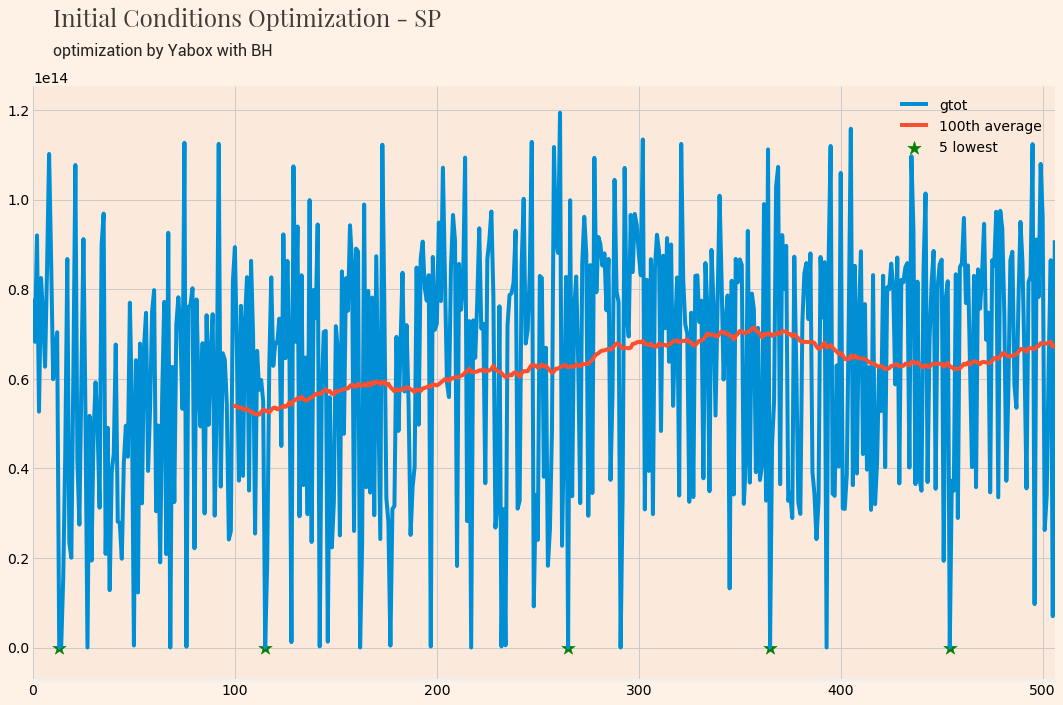

# Results for ES State Brazil

,gtot,s0,startdate,i0,wcases,wrec,beta0,beta01,startT,beta2,sigma,sigma2,sigma3,gamma,b,gamma2,d,mu
349,613766.880014,544662.941822,2020-04-08,58.112935,0.377714,0.009667,0.191452,0.187631,7.975847,0.037476,0.008333,0.12399,0.396621,0.099636,0.093362,1.000000e-12,0.007914,0.000204


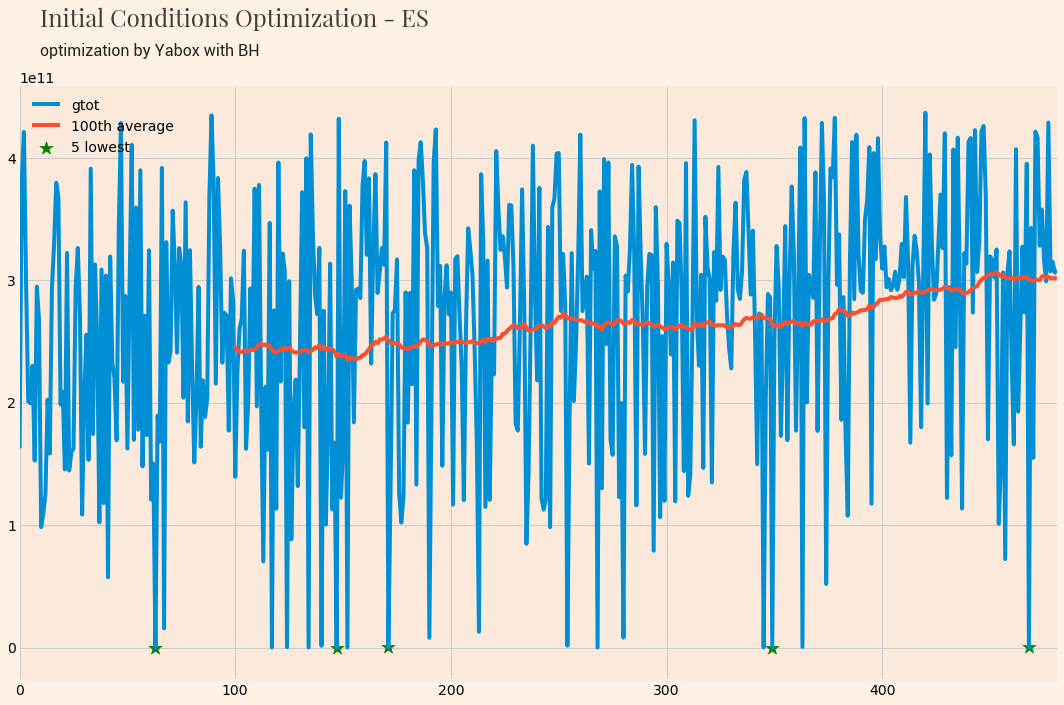

# Results for MG State Brazil

,gtot,s0,startdate,i0,wcases,wrec,beta0,beta01,startT,beta2,sigma,sigma2,sigma3,gamma,b,gamma2,d,mu
332,3.090153e+11,881897.464558,2020-03-29,191.217532,0.493572,0.011408,1.000000e-12,1.000000e-12,5.0,0.000045,0.008333,0.4,0.008333,1.000000e-12,0.4,1.000000e-12,0.4,1.000000e-12


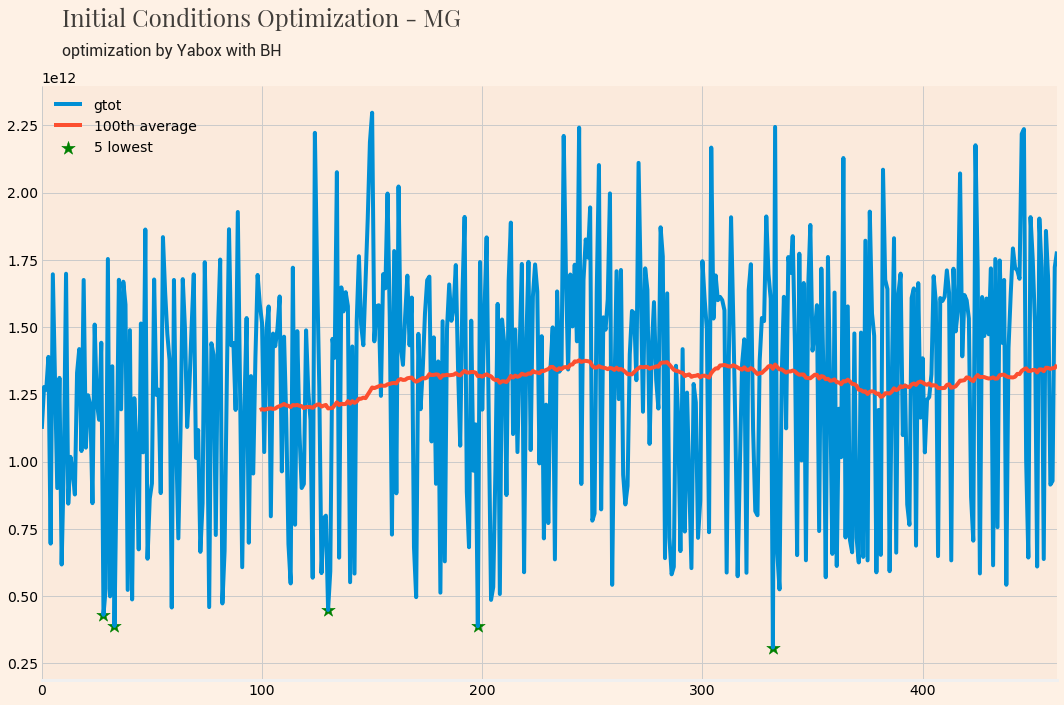

# Results for RJ State Brazil

,gtot,s0,startdate,i0,wcases,wrec,beta0,beta01,startT,beta2,sigma,sigma2,sigma3,gamma,b,gamma2,d,mu
81,5.685297e+06,736594.981904,2020-03-20,780.818983,0.33965,0.040176,2.237762e-09,1.000000e-12,5.005367,0.000034,0.008344,0.009206,0.008697,0.000367,0.000801,1.000000e-12,0.004265,0.000152


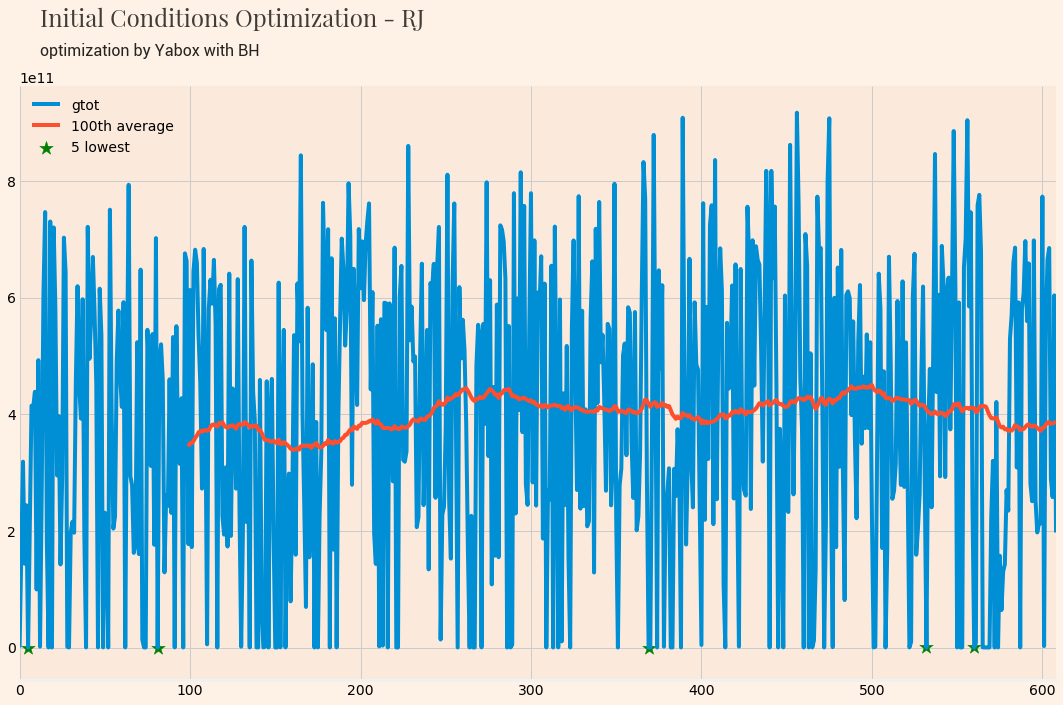

# Results for PE State Brazil

,gtot,s0,startdate,i0,wcases,wrec,beta0,beta01,startT,beta2,sigma,sigma2,sigma3,gamma,b,gamma2,d,mu
121,2.296836e+06,780189.187066,2020-03-22,820.993715,0.332845,0.037541,3.063845e-07,0.000003,5.000782,0.000002,0.008851,0.008333,0.008333,1.000000e-12,0.000532,1.000000e-12,0.000566,6.006029e-09


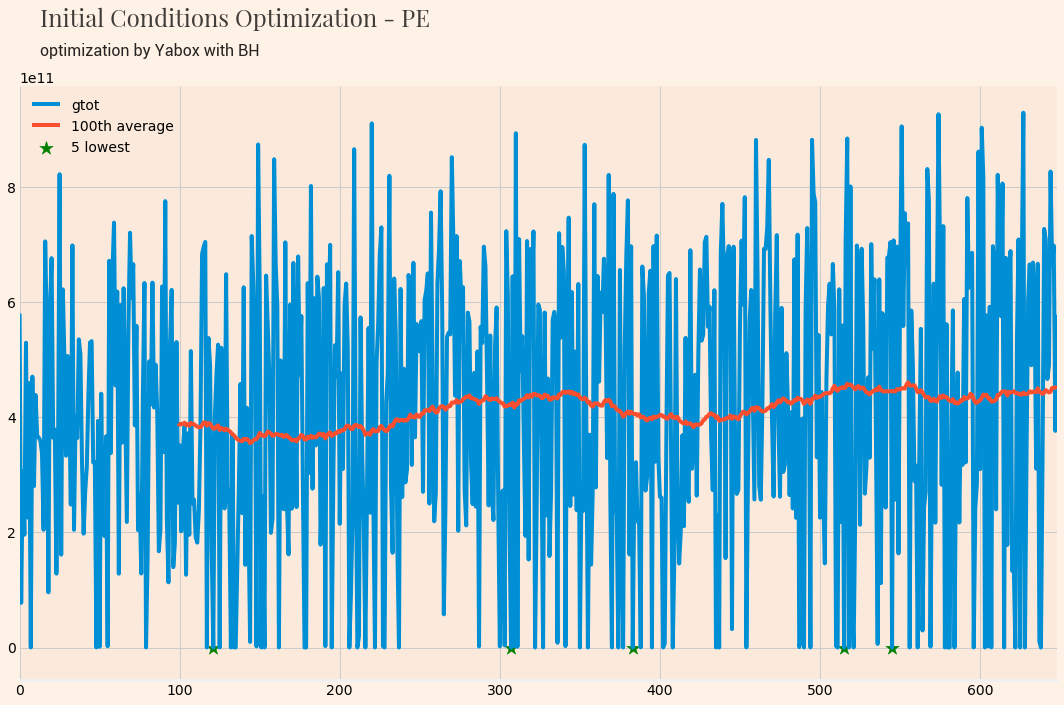

# Results for CE State Brazil

,gtot,s0,startdate,i0,wcases,wrec,beta0,beta01,startT,beta2,sigma,sigma2,sigma3,gamma,b,gamma2,d,mu
44,1.489379e+07,836568.08313,2020-03-12,956.810285,0.397241,0.042214,2.826633e-09,1.222349e-09,5.015551,0.000022,0.008333,0.014219,0.017667,0.011107,0.000638,1.000000e-12,0.006466,0.000089


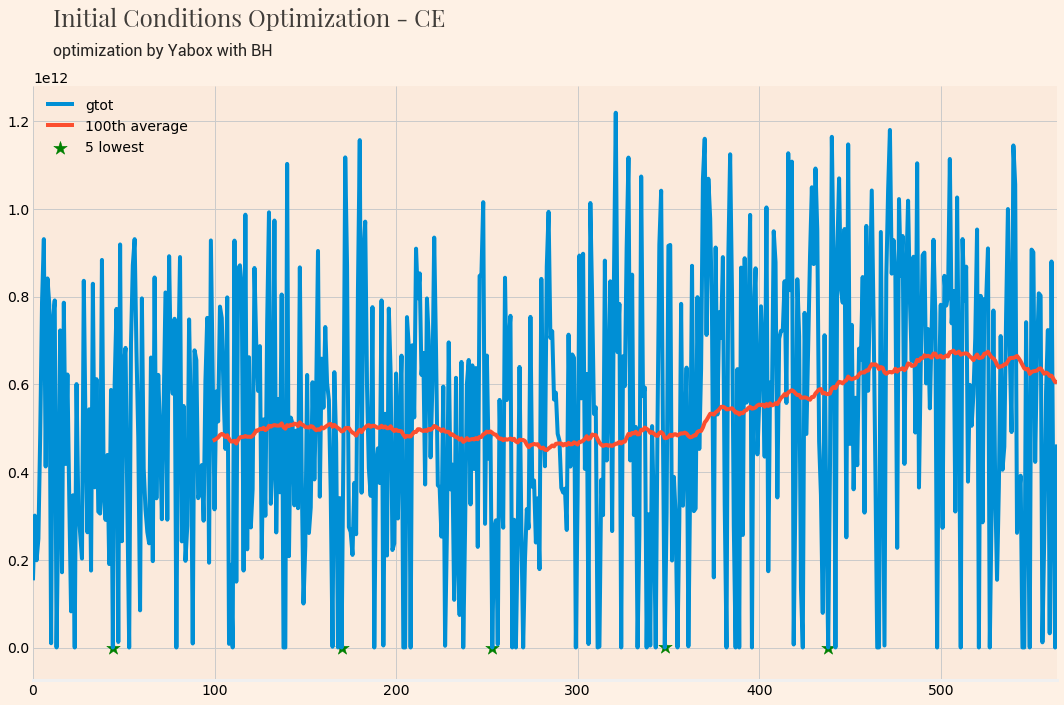

# Results for AM State Brazil

,gtot,s0,startdate,i0,wcases,wrec,beta0,beta01,startT,beta2,sigma,sigma2,sigma3,gamma,b,gamma2,d,mu
67,6.957720e+06,734161.6622,2020-03-28,690.103606,0.310745,0.024518,9.482227e-08,1.000000e-12,5.000006,0.000013,0.008333,0.008334,0.008333,1.000000e-12,8.437545e-07,1.000000e-12,3.909253e-07,1.000000e-12


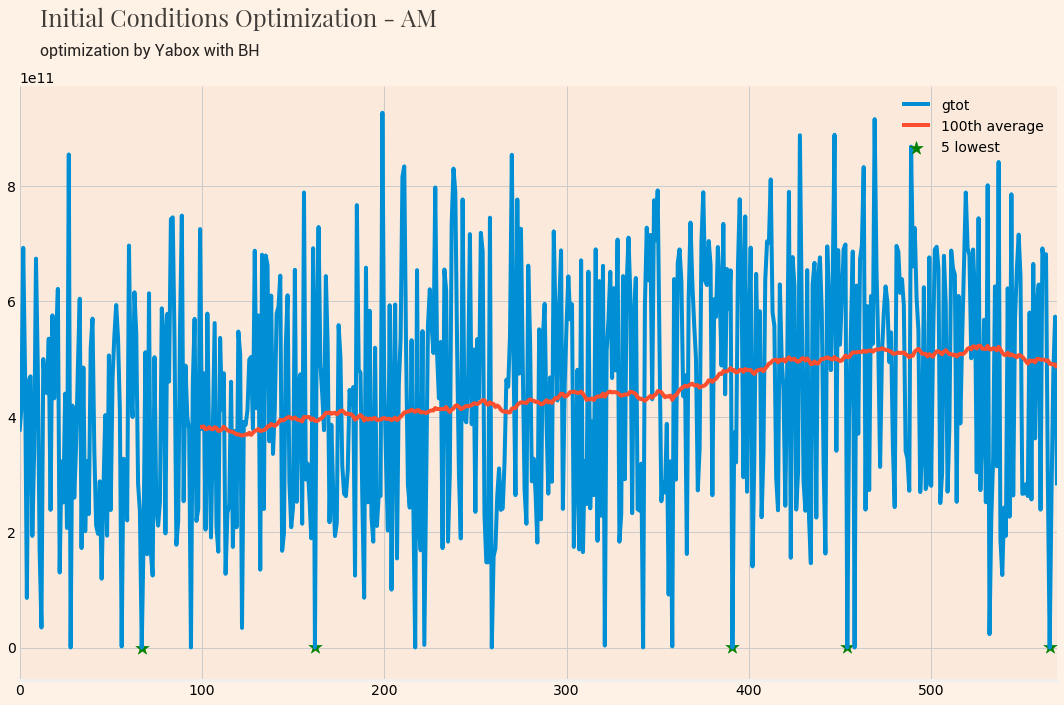

In [191]:
for state in states:
    versionStr=str(version)
    histOptAll= pd.read_table('./results/history_'+state+versionStr+'.csv', sep=",", index_col=0, header=None, 
        names = ["state","gtot",\
            "s0","startdate","i0","wcases","wrec",\
            "beta0","beta01","startT","beta2","sigma",\
            "sigma2","sigma3","gamma","b","gamma2","d","mu"])

    #clean data
    histOptAll=histOptAll.dropna(how='all')
    histOptAll.gtot=pd.to_numeric(histOptAll.gtot, errors='coerce')
#     histOptAll.drop(histOptAll[histOptAll['gtot'] > 5e9].index, inplace = True)
    histOptAll = histOptAll.reset_index(drop=True)

    #print optimum parameters
    histOpt=histOptAll[histOptAll.gtot==min(histOptAll.gtot)]
    histOpt=histOpt.head(1)
    display(Markdown("# Results for "+state+" State Brazil"))
    display(histOpt)
    histOpt.to_csv("data/vars_optimized_"+state+model+"HistMin.csv", sep=",", index=False)
        
    #current parameters
    query = dfparam.query('state == "{}"'.format(state)).reset_index()
    parameters = np.array(query.iloc[:, 2:])[0]
    date,predict_range,s0,e0,a0,i0,r0,d0,startNCases,ratio,wcases,wrec = parameters
        
    #save new parameters
    j = query['index'].values[0]
    dfparam.at[j, "s0"] = histOpt.s0
    dfparam.at[j, "i0"] = histOpt.i0
    dfparam.at[j, "start-date"] = date
    dfparam.at[j, "WCASES"] = histOpt.wcases
    dfparam.at[j, "WREC"] = histOpt.wrec
    dfparam.to_csv("data/param_optimized_"+model+"HistMin.csv", sep=",", index=False)
    
    #prepare plotting
    color_bg = '#FEF1E5'
    # lighter_highlight = '#FAE6E1'
    darker_highlight = '#FBEADC'
    plt.rc('font', size=14)
    fig, ax = plt.subplots(figsize=(15, 10),facecolor=color_bg)
    ax.patch.set_facecolor(darker_highlight)
    # Hide the left, right and top spines
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    #PLOTTING itself
    x=histOptAll.index
    y=histOptAll.gtot
    ax.plot(x,y, label="gtot")
    histMin=histOptAll.nsmallest(5, ['gtot'])
    ax.scatter(histMin.index, histMin.gtot,label="5 lowest",c='green',marker='*',s=200)
    histOptAll.rolling(100).mean()['gtot'].plot(label="100th average")

    # Adding a title and a subtitle
    plt.text(x = 0.02, y = 1.1, s = "Initial Conditions Optimization - "+state,
                fontsize = 34, weight = 'bold', alpha = .75,transform=ax.transAxes, 
                fontproperties=heading_font)
    plt.text(x = 0.02, y = 1.05,
                s = "optimization by "+model,
                fontsize = 26, alpha = .85,transform=ax.transAxes, 
                fontproperties=subtitle_font)
    ax.legend(frameon=False)
    fig.tight_layout()
    strFile ='./results/convergence_'+state+versionStr+'.png'
    fig.savefig(strFile, facecolor=fig.get_facecolor(), edgecolor=fig.get_edgecolor())
    
    plt.show()

In [192]:
display(Markdown("# Final Results for Initial Conditions"))
display(Markdown("## "+model+" optimization model"))
display(dfparam)

# Final Results for Initial Conditions

## Yabox with BH optimization model

,state,start-date,prediction-range,s0,e0,a0,i0,r0,d0,START,RATIO,WCASES,WREC
0,SP,2020-03-15,200,8.680479e+06,0,0,775,300,250,100,0.15,0.317895,0.030790
1,ES,2020-04-01,200,5.446629e+05,0,0,58,250,50,100,0.15,0.377714,0.009667
2,MG,2020-04-01,200,8.818975e+05,0,0,191,250,40,100,0.15,0.493572,0.011408
3,RJ,2020-03-20,200,7.365950e+05,0,0,780,250,50,100,0.15,0.339650,0.040176
4,CE,2020-03-20,200,8.365681e+05,0,0,956,250,50,100,0.15,0.397241,0.042214
5,PE,2020-03-20,200,7.801892e+05,0,0,820,250,100,100,0.15,0.332845,0.037541
6,AM,2020-03-20,200,7.341617e+05,0,0,690,250,100,100,0.15,0.310745,0.024518
